# EDA

In [32]:
# Bibliotecas para Manipulación de Datos y Análisis
import pandas as pd 
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Operaciones del sistema operativo
import os  

In [33]:
# Aplico el tema de tableau
plt.style.use('tableau-colorblind10')

# Configuro los parámetros iniciales de matplotlib para estandarizar los gráficos
params = {
    'figure.figsize': (16, 10),  # Establezco el tamaño de cada gráfico
    'figure.dpi': 80,  # Configuro la resolución por pulgada
    'figure.facecolor': 'white',  # Defino el color de fondo
    'figure.edgecolor': 'white',  # Defino el color del borde
    'figure.frameon': True,  # Mantengo el borde del gráfico activado
    'figure.constrained_layout.use': False,  # Desactivo el diseño restringido para las figuras
    'figure.constrained_layout.h_pad': 0.04167,  # Espaciado horizontal en el diseño restringido
    'figure.constrained_layout.w_pad': 0.04167,  # Espaciado vertical en el diseño restringido
    'axes.labelsize': 12,  # Establezco el tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,  # Establezco el tamaño del título
    'axes.labelweight': 'normal',  # Configuro el grosor de la fuente de las etiquetas
    'xtick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje y
    'xtick.color': 'black',  # Configuro el color de las etiquetas del eje x
    'ytick.color': 'black',  # Configuro el color de las etiquetas del eje y
    'axes.spines.top': True,  # Mantengo visible el borde superior del gráfico
    'axes.spines.right': True,  # Mantengo visible el borde derecho del gráfico
    'legend.frameon': True,  # Mantengo visible el marco de la leyenda
    'grid.linestyle': '-',  # Defino el estilo de las líneas de la cuadrícula
    'grid.linewidth': 0.8,  # Configuro el grosor de las líneas de la cuadrícula
    'grid.color': 'gray',  # Establezco el color de las líneas de la cuadrícula
    'legend.fontsize': 10,  # Configuro el tamaño de la fuente de la leyenda
    'axes.titleweight': 'normal',  # Establezco el grosor de la fuente del título
    'axes.titlecolor': 'black',  # Configuro el color del título
    'axes.titlelocation': 'center',  # Coloco el título en el centro del gráfico
}

# Actualizo los parámetros de Matplotlib con la configuración establecida
plt.rcParams.update(params)

# Activo la visualización de gráficos en línea (dentro de la celda de código)
%matplotlib inline

In [34]:
path_df_processed = '../data/3_gold/df_processed.csv'
path_df_encoded_scaled = '../data/2_silver/df_encoded_scaled.csv'

In [35]:
df_encoded_scaled = pd.read_csv(path_df_encoded_scaled)
df_processed = pd.read_csv(path_df_processed)

### Correlacion entre variables

#### Matriz de correlacion

In [36]:
df_encoded_scaled

,num__customer_id,num__age,num__purchase_amount_usd,num__review_rating,num__previous_purchases,ord__size,ord__subscription_status,ord__promo_code_used,ord__frequency_of_purchases,ord__vital_stages,ord__season,nom__gender,nom__item_purchased,nom__category,nom__location,nom__color,nom__shipping_type,nom__payment_method
0,-1.000000,0.423077,-0.166667,-0.461538,-0.44,2.0,1.0,1.0,1.0,1.0,0.0,1,2,1,16,7,1,5
1,-0.999487,-0.961538,0.095238,-0.461538,-0.92,2.0,1.0,1.0,1.0,0.0,0.0,1,23,1,18,12,1,1
2,-0.998974,0.230769,0.309524,-0.461538,-0.08,0.0,1.0,1.0,0.0,1.0,1.0,1,11,1,20,12,2,2
3,-0.998461,-0.884615,0.714286,-0.153846,0.96,1.0,1.0,1.0,0.0,1.0,1.0,1,14,2,38,12,3,4
4,-0.997948,0.038462,-0.261905,-0.769231,0.24,1.0,1.0,1.0,4.0,1.0,1.0,1,2,1,36,21,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.997948,-0.153846,-0.761905,0.384615,0.28,2.0,0.0,0.0,0.0,1.0,2.0,0,9,1,45,21,0,5
3896,0.998461,0.307692,-0.261905,0.615385,0.64,2.0,0.0,0.0,1.0,1.0,1.0,0,0,0,14,23,5,0
3897,0.998974,0.076923,-0.642857,-0.615385,-0.04,2.0,0.0,0.0,3.0,1.0,1.0,0,1,0,29,8,4,5
3898,0.999487,0.000000,0.404762,0.076923,-0.04,0.0,0.0,0.0,0.0,1.0,2.0,0,17,2,22,3,1,5


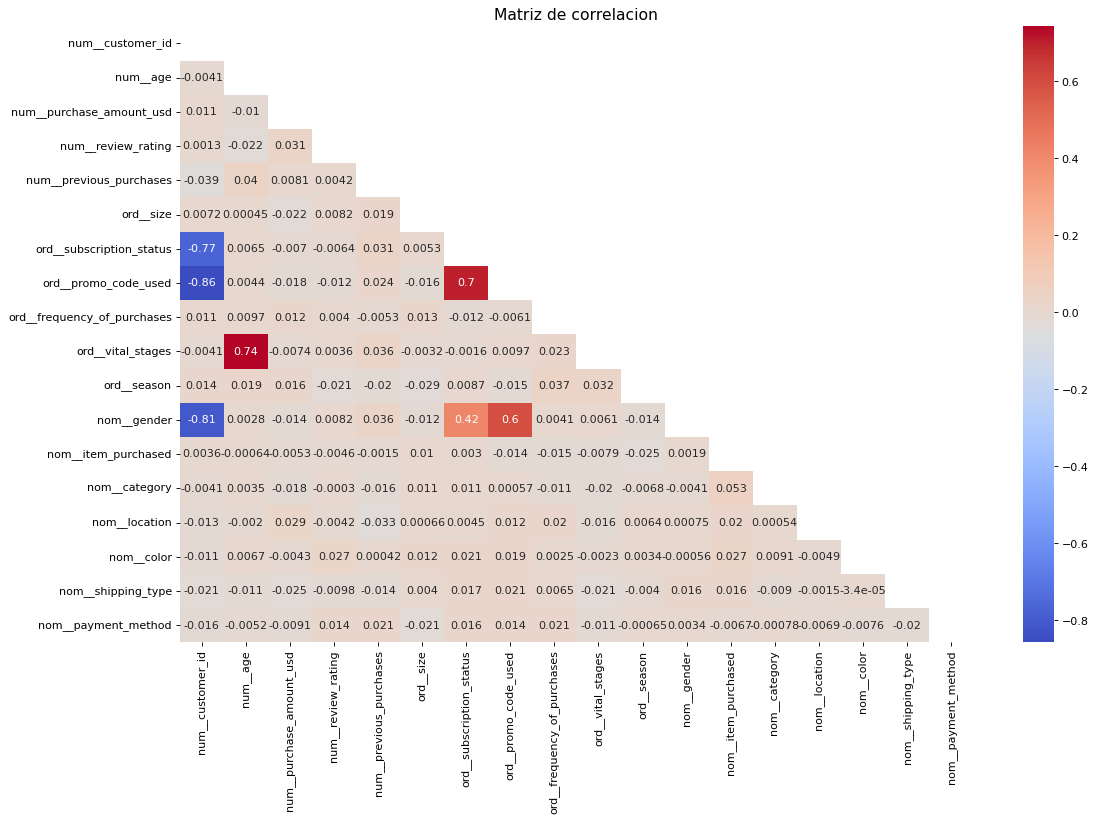

In [37]:
# creo una matriz de correlacion traingular, eliminando la parte espejo por mdeio de una mask creada con mumpy
matriz_corr = df_encoded_scaled.copy().corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
sns.heatmap(data=matriz_corr, mask = mask, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

**Obvseraciones de las correlaciones lineales de fuerza media a alta por pares de columnas:**

**promo_code_used:**
- `subscription_status`: **Positiva** con una **fuerza alta del 70%**. Sugiere que cuanto mas se utilizan los descuentos ofrecidos a cada cliente este tiene una alta probabilidad de subscribirse.
- `gender`: **Positiva** con una **fuerza media/fuerte del 60%**. Sugiere que hay una tendencia por uno de los generos a utilizar los codigos de descuento.

In [38]:
df_encoded_scaled.columns

Index(['num__customer_id', 'num__age', 'num__purchase_amount_usd',
       'num__review_rating', 'num__previous_purchases', 'ord__size',
       'ord__subscription_status', 'ord__promo_code_used',
       'ord__frequency_of_purchases', 'ord__vital_stages', 'ord__season',
       'nom__gender', 'nom__item_purchased', 'nom__category', 'nom__location',
       'nom__color', 'nom__shipping_type', 'nom__payment_method'],
      dtype='object')

In [41]:
columns_with_high_correlation = ['num__age','num__previous_purchases', 'ord__subscription_status','ord__promo_code_used','ord__vital_stages','ord__season', 'nom__gender', 'nom__shipping_type']

#### Pairplot

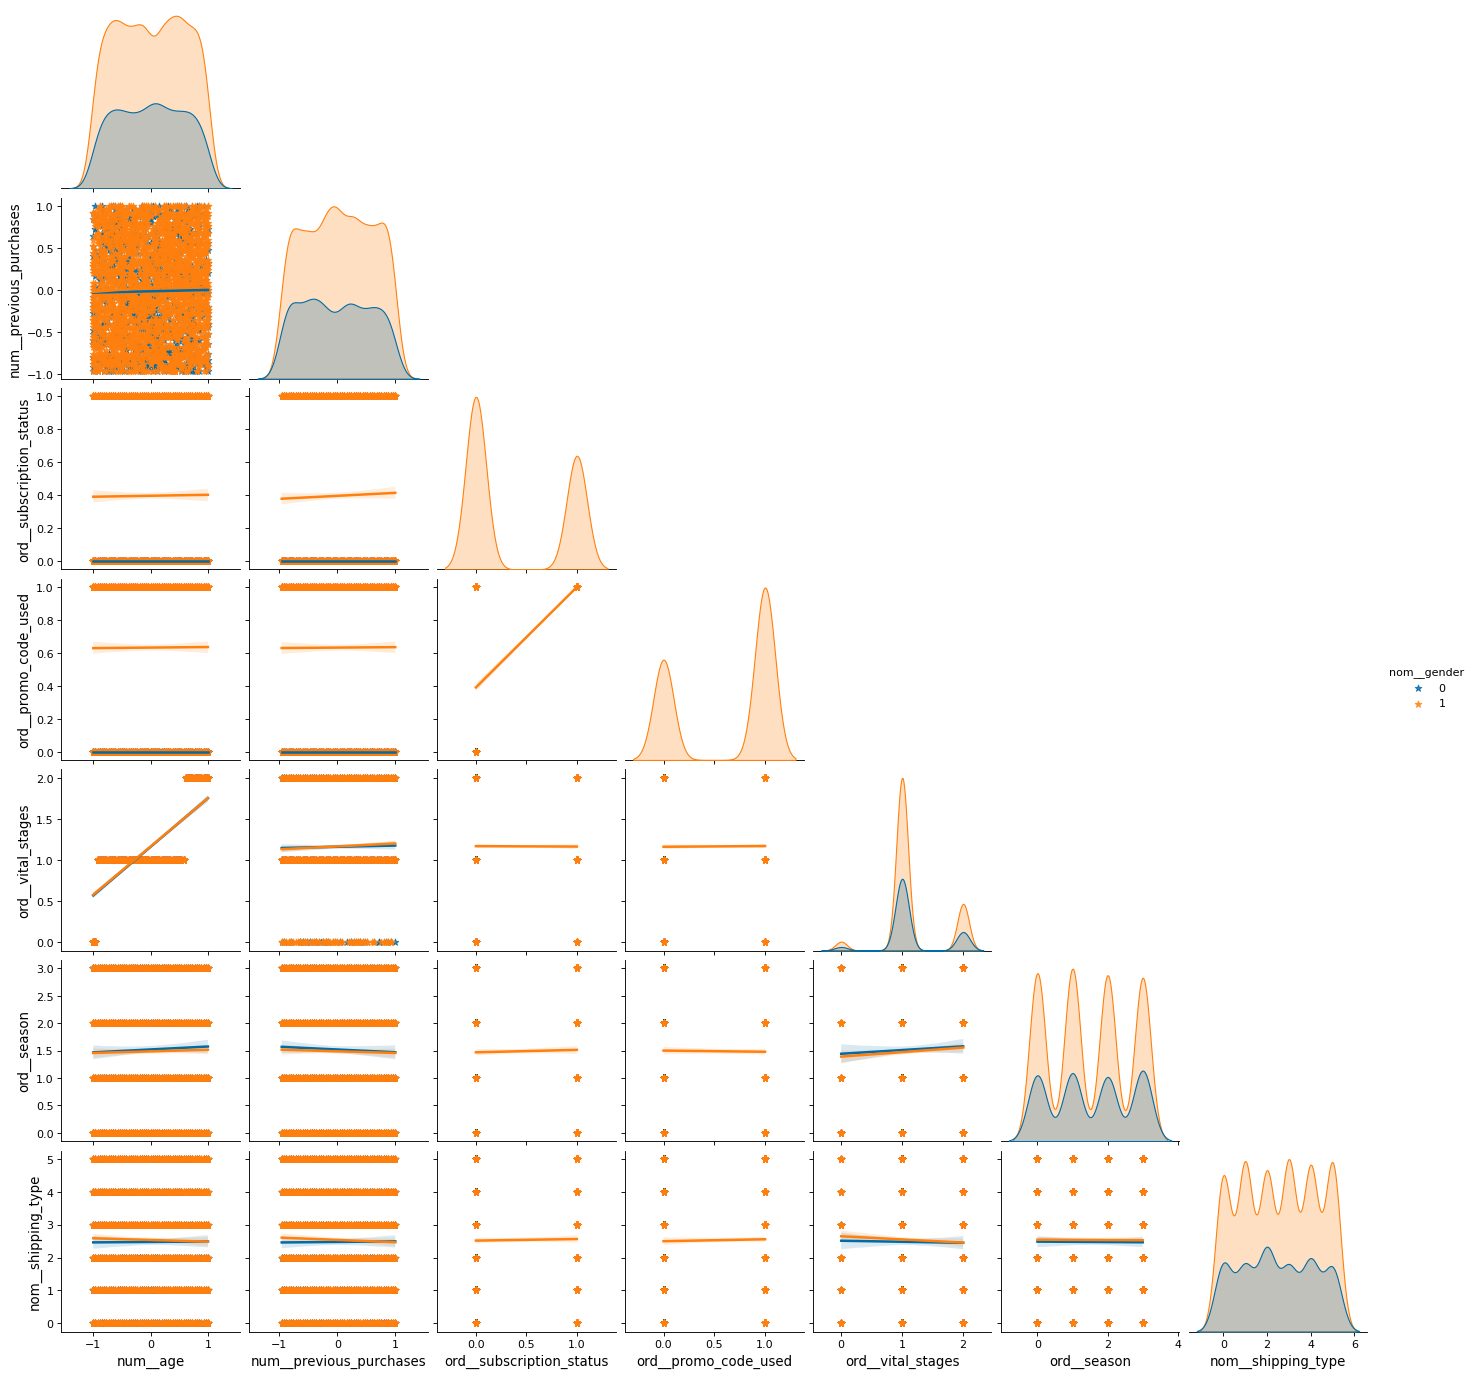

In [44]:
sns.pairplot(data=df_encoded_scaled[columns_with_high_correlation], corner=True, hue='nom__gender', kind='reg', markers='*', diag_kind='auto')
plt.show()

### Univariables descriptivos

**Cualitativo**

In [57]:
# Histplot
columns_with_high_correlation_not_encoded_histplot = [
 'subscription_status',
 'discount_applied',
 'promo_code_used',
 'gender',
 'shipping_type']

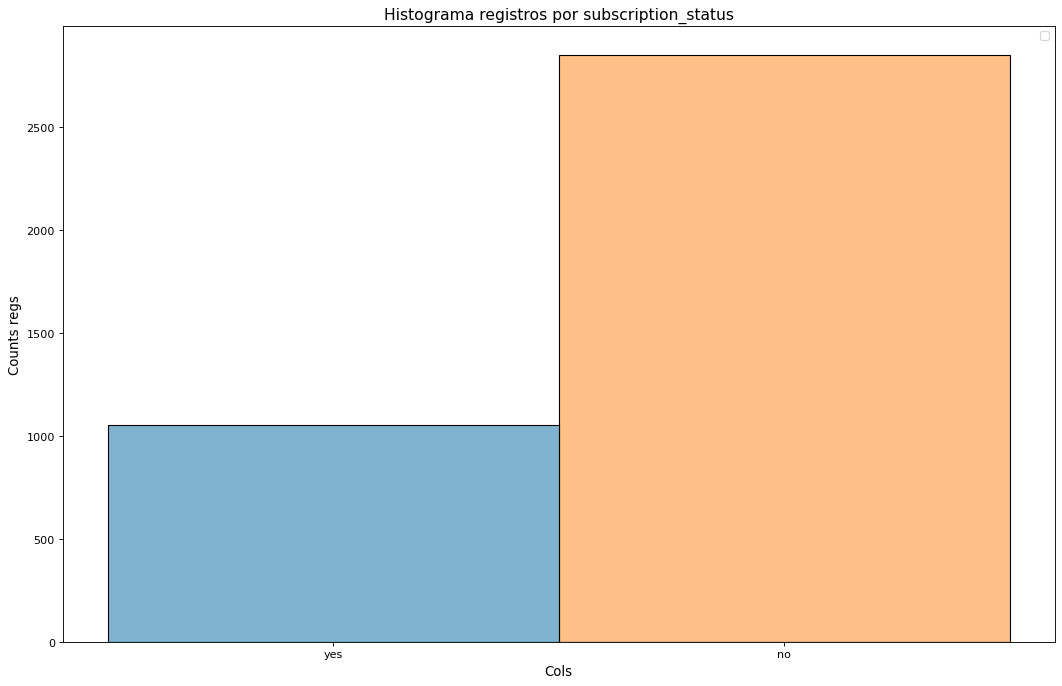

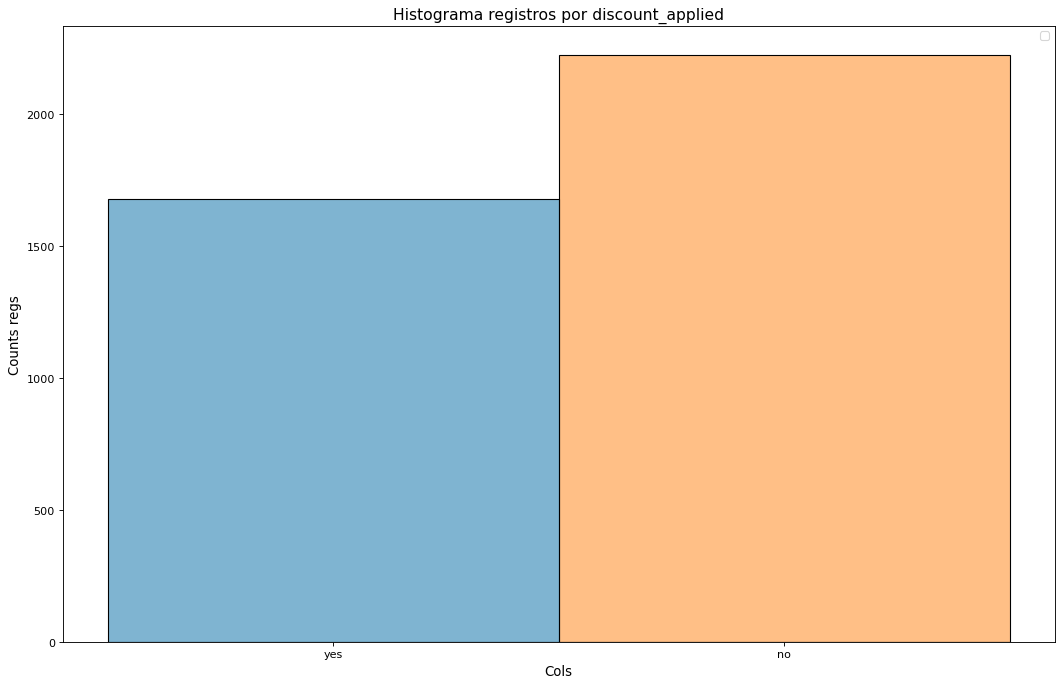

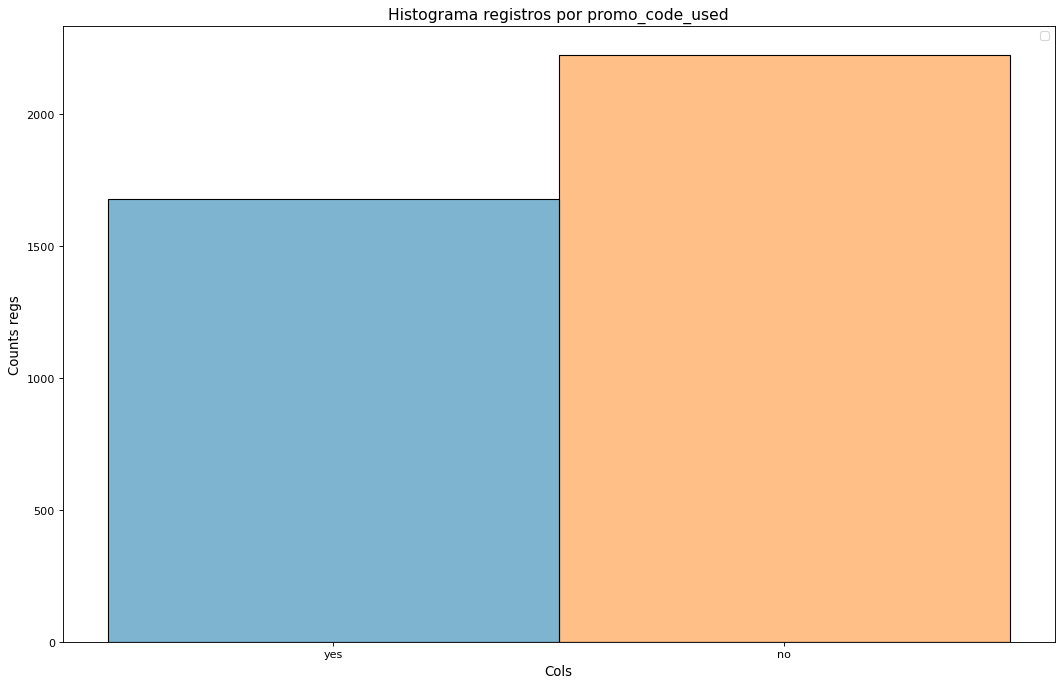

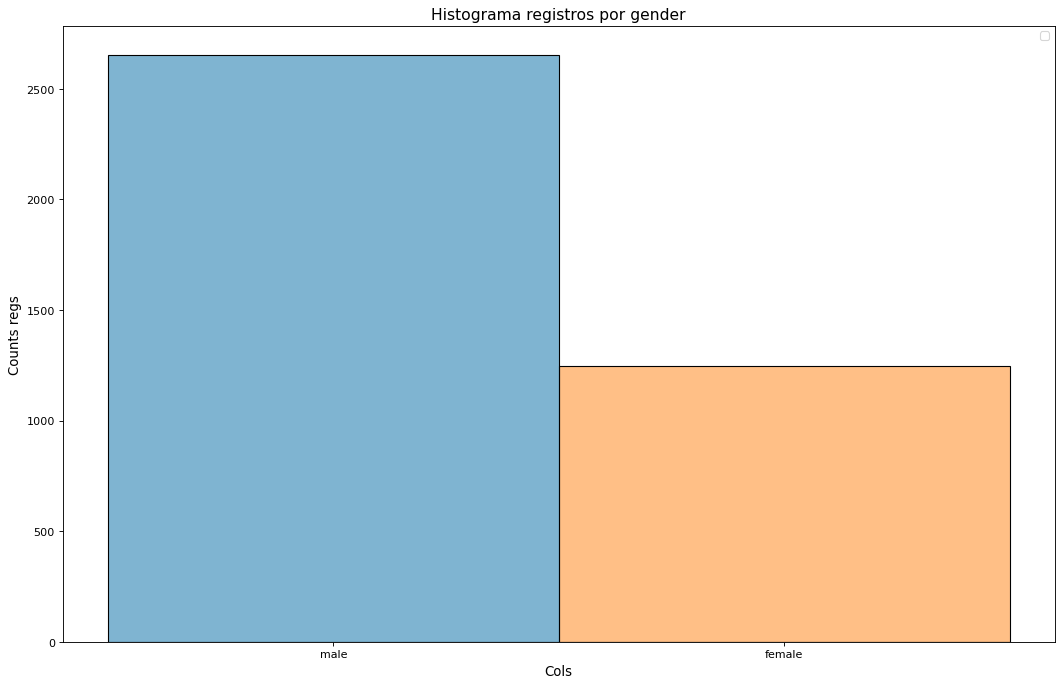

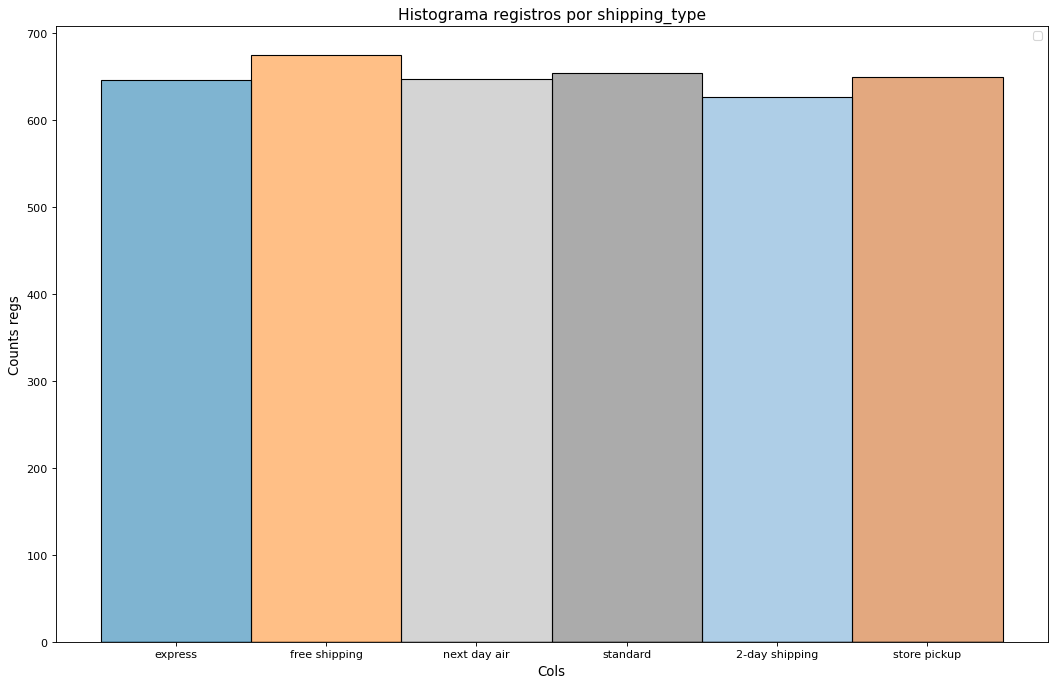

In [58]:
for col in columns_with_high_correlation_not_encoded_histplot:
    sns.histplot(data=df_processed[columns_with_high_correlation_not_encoded_histplot], x=col, stat='count', bins='auto', hue=col, legend=False)
    plt.title(f'Histograma registros por {col}')
    plt.ylabel('Counts regs')
    plt.xlabel('Cols')
    plt.legend([])
    plt.xticks()
    plt.show()

In [59]:
columns_with_high_correlation_encoded_lineplot = ['vital_stages_encoded', 'season_encoded']

In [60]:
columns_with_high_correlation_not_encoded_lineplot = ['vital_stages','season']

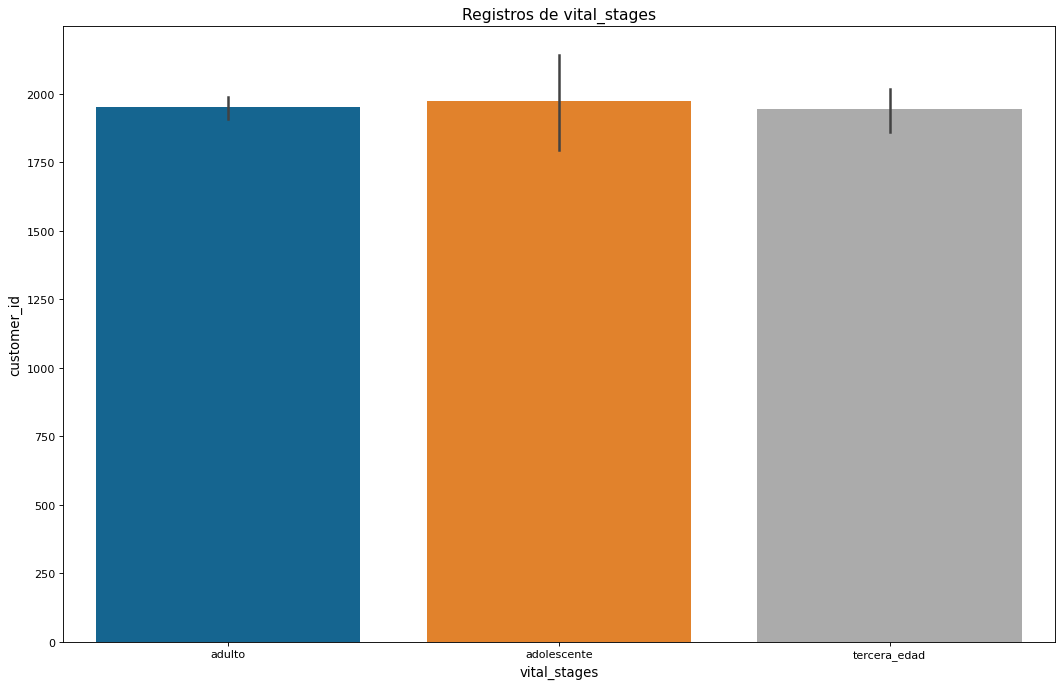

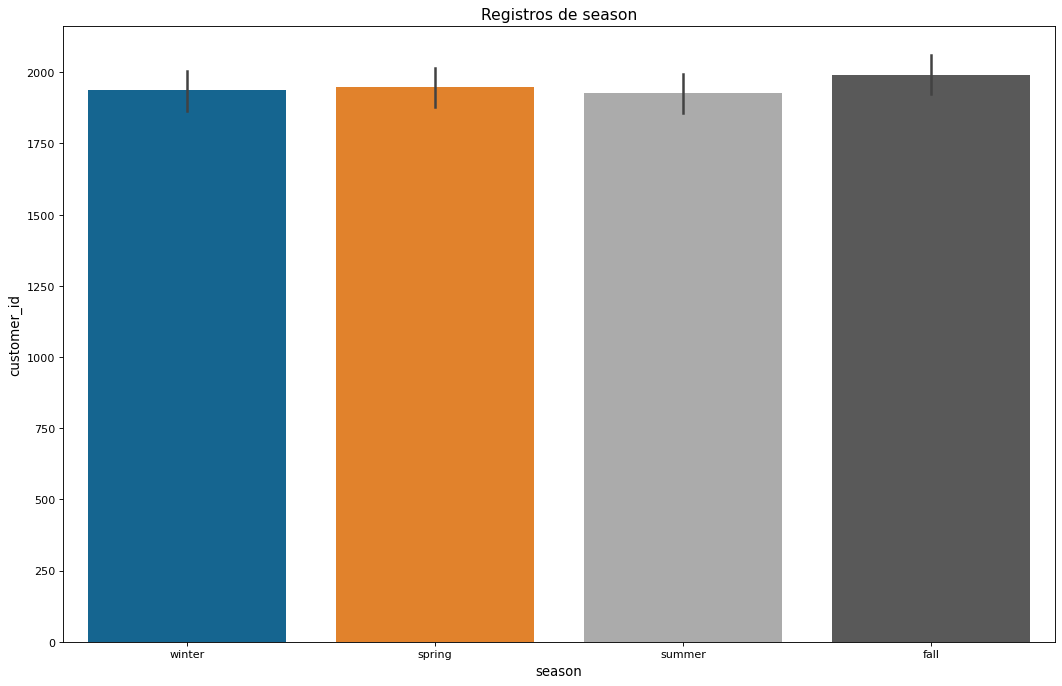

In [61]:
for col in columns_with_high_correlation_not_encoded_lineplot:
    sns.barplot(data=df_processed, x=col, y='customer_id', hue=col)
    plt.title(f'Registros de {col}')
    plt.show()

### Observación de histogramas univariables:

- **`subscription_status`**: Se observa una predominancia de personas que no se suscriben al servicio, con un poco más de 1,000 clientes suscritos y más de 2,800 clientes no suscritos.
  
- **`promo_code_used`**: Se observa una mayor cantidad de clientes que no utilizan códigos de descuento, siendo aproximadamente 1,600 los que sí lo usan y más de 2,300 los que no.
  
- **`gender`**: Predominan notablemente las compras de clientes masculinos sobre las femeninas, con más de 2,600 compras realizadas por hombres y más de 1,200 por mujeres.
  
- **`shipping_type`**: Los distintos tipos de envío (`'express'`, `'free shipping'`, `'next day air'`, `'standard'`, `'2-day shipping'`, `'store pickup'`) se encuentran en un rango similar de entre 600 y 700 pedidos, con una ligera y esperada predominancia del envío gratuito sobre los demás.
  
- **`vital_stages`**: Las tres etapas de vida que más consumen (adultos, adolescentes y personas de la tercera edad) se mantienen en el mismo rango aproximado de 1,800 a 2,000 consumidores.
  
- **`seasons`**: De manera similar a las etapas de vida, las diferentes estaciones del año (`'winter'`, `'spring'`, `'summer'`, `'fall'`) se mantienen en un rango de entre 1,800 y 2,000 compras.

### Bivariados descriptivos

In [62]:
#  Diagrama de cajas (Boxplot)
columns_with_high_correlation_not_encoded_boxplot = ['age']

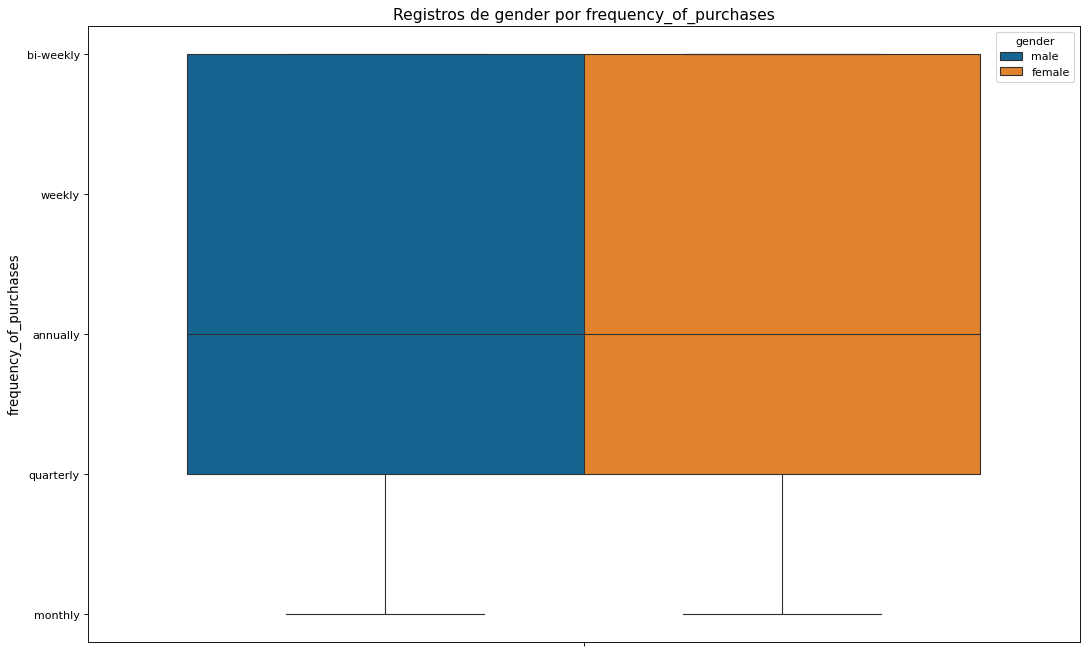

In [49]:
var_ind = 'frequency_of_purchases'
var_class = 'gender'

sns.boxplot(data=df_processed, y=var_ind, hue=var_class)
plt.title(f'Registros de {var_class} por {var_ind}')
plt.show()

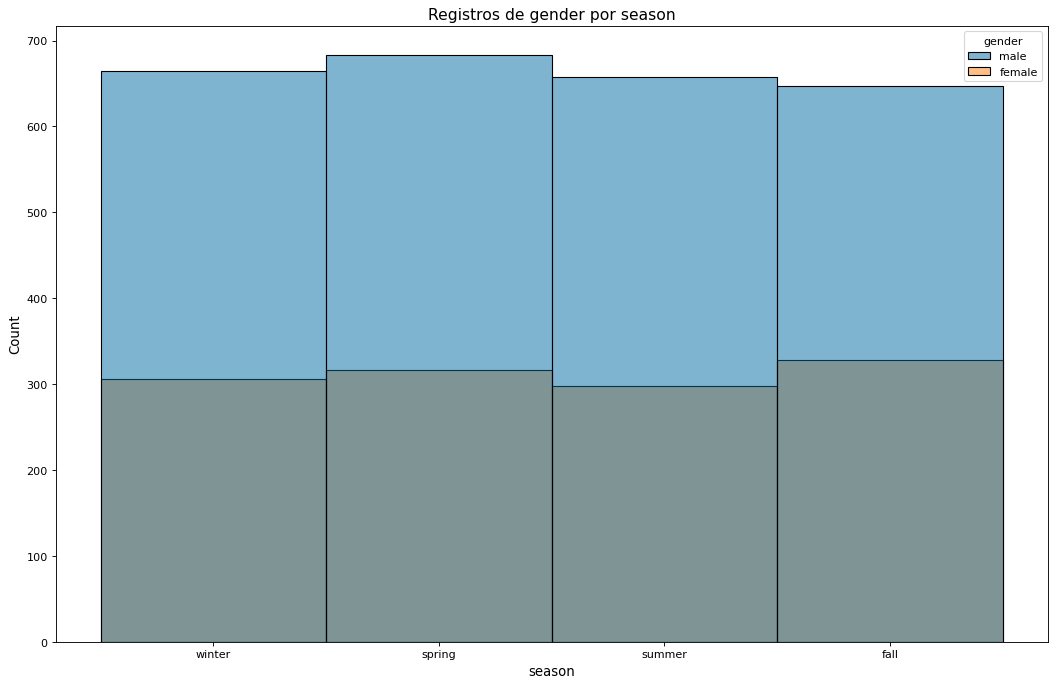

In [47]:
var_ind = 'season'
var_class = 'gender'

sns.histplot(data=df_processed, x=var_ind, hue=var_class)
plt.title(f'Registros de {var_class} por {var_ind}')
plt.show()

### Bivariado de Distribucion

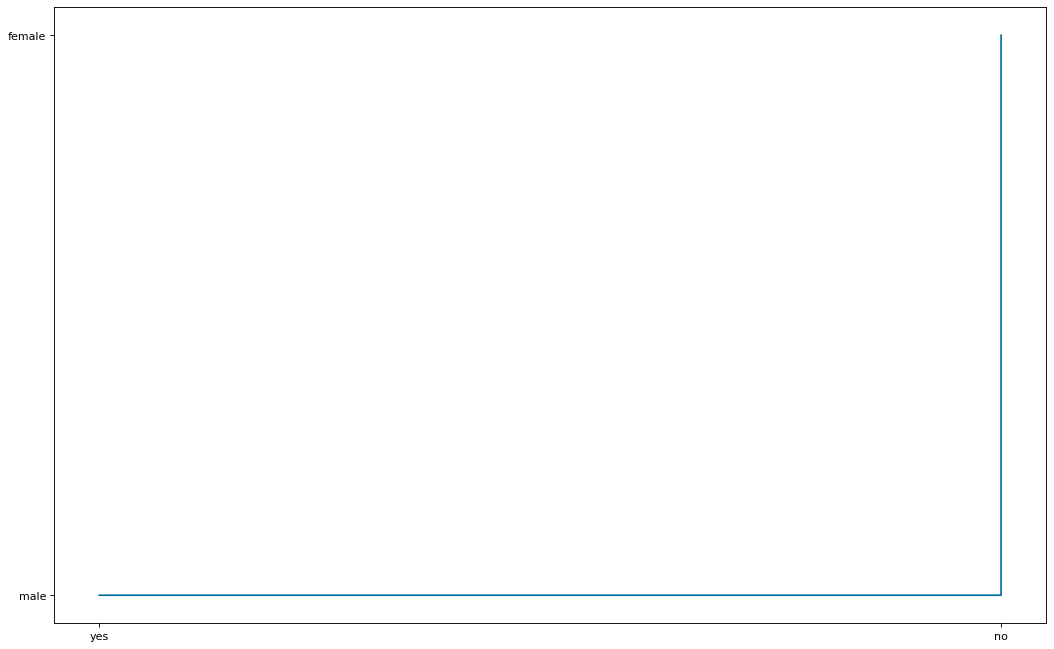

In [103]:
plt.plot(df_processed['promo_code_used'], df_processed['gender'])
plt.show()

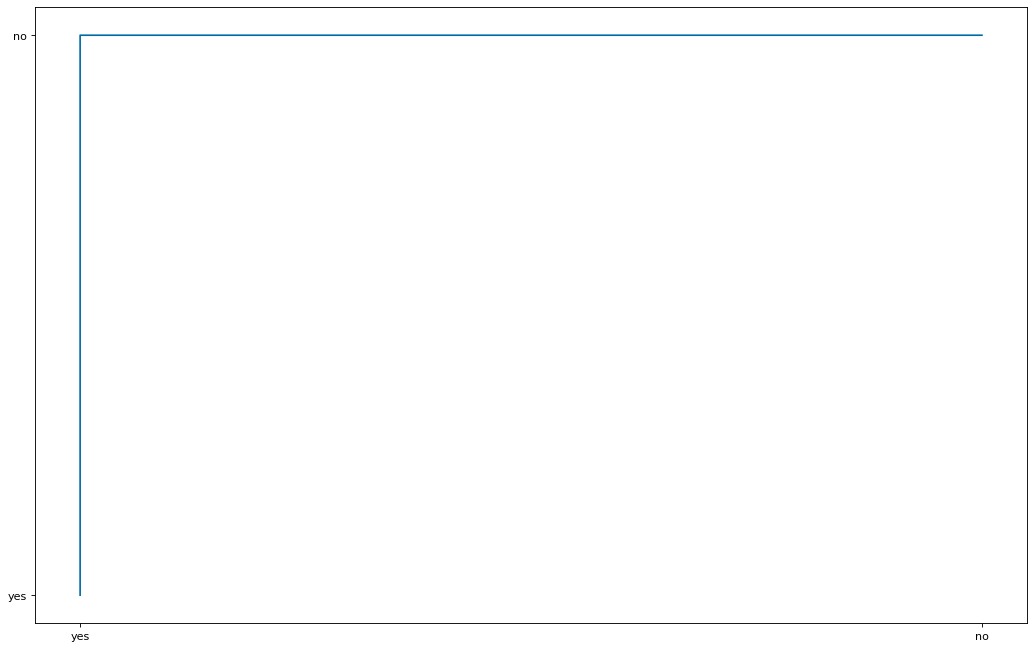

In [104]:
plt.plot(df_processed['promo_code_used'], df_processed['subscription_status'])
plt.show()

### Conclusiones de gráficos bivariados:

- **`frequency_of_purchases` por `gender`**: Tanto hombres como mujeres compran principalmente cada dos semanas, semanalmente, anualmente o trimestralmente, siendo muy poco común que lo hagan mensualmente.
  
- **`season` por `gender`**: Ambos géneros compran de manera bastante homogénea en las distintas estaciones. Las mujeres realizan entre 300 y 350 compras, mientras que los hombres entre 650 y 700.
  
- **`promo_code_used` por `gender`**: El género masculino es el único que utiliza códigos promocionales.
  
- **`subscription_status` por `promo_code_used`**: Existe una correlación directa entre el uso de códigos promocionales y el estado de suscripción.